# Example of fitting basis functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

# Load velocity cube

In [3]:
data_path = '/Users/raineyaberle/Research/PhD/Hubbard/'
xds = rxr.open_rasterio(os.path.join(data_path, 'velocity', 
                                     'hubbard_inversion_2015-10-01_2023-01-01_xform.nc'))
# Add velocity magnitude variable
xds['v'] = np.sqrt(xds['vx']**2 + xds['vy']**2)

## Clip to glacier boundaries

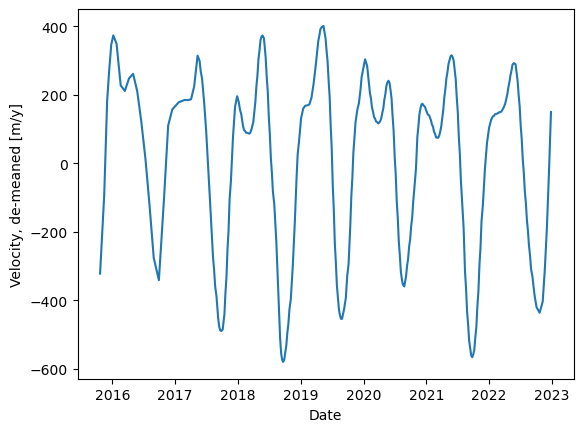

In [6]:
bounds = gpd.read_file(os.path.join(data_path, 'RGI', 'Hubbard_boundaries_clipped.shp'))
xds_clip = xds.rio.clip(bounds.geometry.values, bounds.crs)
# Remove wonky values
xds_clip = xr.where(xds_clip < 10e3, xds_clip, np.nan)

# Plot the spatial mean over time for a point near the terminus
v_mean = xds_clip['v'].mean(dim=['x', 'y']).data
v_mean_demean = v_mean - np.nanmean(v_mean)
t = np.array([np.datetime64(x) for x in xds_clip.time.data]).astype('datetime64[D]')
dt = (t - t[0]).astype(float)
plt.plot(t, v_mean_demean)
plt.xlabel('Date')
plt.ylabel('Velocity, de-meaned [m/y]')
plt.show()

## Make basis functions to fit data with

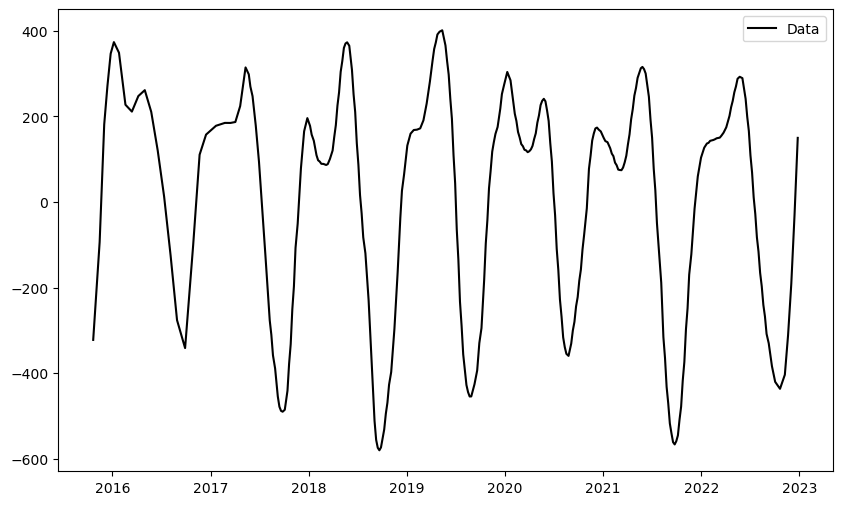

In [33]:
# Spring speedup
b0 = 400*np.sin((dt/365*8-2))

# Fall speedup


plt.figure(figsize=(10,6))
plt.plot(t, v_mean_demean, '-k', label='Data')
# plt.plot(t, b0, "m", label="Spring speed-up")
# plt.plot(t, b1, "r", label="Fall speed-up")
plt.legend()
plt.show()

## Find best coefficents for basis functions

In [ ]:
G = np.vstack((b0, b1)).T
d = y

m = np.linalg.lstsq(G, d, rcond=None)[0]
# Similar to 

## Plot fit to data

In [ ]:
plt.plot(x,y, 'k.', label="data")
plt.plot(x, G@m, "r-", label="model")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data and Model")
plt.legend()
plt.show()